# Memo

# Memo about significant change

## Possible improvements
### Memo
- [x] （travel pattern の行動中の動きについて、うまく全部繋げられるか？現状次の行動の開始地点と前の行動の終了地点が一致しない） -> しようと思えば、終了地点と開始地点を揃えられるが、行動内で生じた誤差として考えてもいい気がする。
- [x] new_functions.update_multi_sensor_log 内の past_x, past_y により赤外線センサが人を動いているかを判定するところで,現状sampling_duration秒前の地点との差分を取っているが，もしもsampling_duration = 10 とすると，10秒前の地点との差分になってしまう->PIRセンサのサンプリングレートが長すぎるとそもそも実用的でないから、妥当な仮定のような気がする。
‐ [x] 経路計算のための distance の情報を計算した後に保存する際のsave json.dumps に MyEncoder 形式で保存するように変更した。また、generate_layout_with_necessary_furniture が繰り返しgenerate_layout を実行する際に、前のデータが完全に上書きされているかどうか確認していない（たぶん全部上書きされているため、不都合は起きないはず。）
- [x] 転倒には30秒かかるので、walkingが重ならないように、location[i]からlocation[i+1]へのpathで転倒する際には、location[i+1]での行動の行動時間が十分長い物を選ぶようにしている．
- [x] 時系列データを (start time of the parameter, value of the parameter) のリストで表現するか、(start time of the parameter, end time of the parameter, value of the parameter)のリストで表現するか。前者は情報量が削減でき，矛盾のチェックが時系列順に並んでいるかどうかだけで済む。後者は最後の期間のパラメータの終了時刻を明示できる（前者ではインデックスがiのパラメータはiの開始時刻からi+1の開始時刻までになるが、リストの最後の要素のパラメータは次の要素がないため、終了時刻がわからない.最後にダミー要素として0の値を持つ期間にすればなんとかなる？）。-> 後者にする．

### Priorities
- [x] フォルダ構造から再考（SISG4HEIALpha の階層的フォルダ構造いる？名前で(layout1)とか毎回指定してもよくない？）フォルダ名にある情報は全部 Semantic.json に入れる．
- [ ] Activity クラスの同一性判定を元に戻した？activity_model.Activity クラスは同一性判定を行動名のみにしているため、そこを強調しないと意図しない書き方をしてしまうかも。正直直してもよい．
- [ ] 睡眠行動にトイレが断続的に入るパターンなどをモデル化する際には、現状の last_activity や sleep_after_24では対応できない。そのため、次の日の行動列も保存し、次の日の生成時にそれをコピーできるように作り変える必要がある。それか，睡眠にトイレ行動としてのサブ行動を許すか？
- [ ] ログのテキストファイルを入力として，リストのオブジェクトに読み込む方法
- [ ] テキスト形式の保存に加えて pickle 等を用いて異常ラベルなどを保存する
- [ ] 新しい家具の追加など、レイアウトの修正を後から簡単にできるようにする。
- [ ] MMSE の幅が 1month 以外でも使いやすいようにする
- [ ] Activity の所の 'Bed' などの場所名は floorplan とかに定数としておかなくて大丈夫か


### Floor plan
- [x] フォルダ名に家具や大きさいる？layoutだけ残すか，もしくは全てフラットにするか？その代わり，家具一覧や大きさ一覧は Semantic.json に組み込む.
- [ ] 自作クラス Zone, Wall, Furniture の活用
- [ ] dis_val のindex と実際のx, y の関係をわかりやすく。（参考、disval を作成する関数、または、Tools_.cal_I_J）
- [ ] ワンルームでなくて、壁がある場合はどうするのか？単純にdisval を100に設定するのか？2階など複雑な住居はどうするのか？
- [ ] 間取りを修正できるようにする．

### Activity schedule
- [ ] 行動列の円グラフ「1日の0:00から3日の0:00まで」とかの切りのいい時はうまくいくが、それ以外の微妙な時刻からの開始・終了にも対応する
- [ ] activity sequence 生成の行動の開始時刻や継続時間のサンプリングの記述を整頓する。例として、Activity.sampling_duration にはremainder と開始時間を入力に取るようにしたり、基本行動の開始時刻のサンプリングを切断正規分布を用いたり、day_schedule.update_schedule 内に短い行動を防ぐ例外処理をまとめたりする。
- [ ] 拡張1. 既に行動 B と C が決まっている場合、行動 A を (1) もしくは (2) のどちらかの条件を満たすように入れる。 (1) A が B と C の間にないといけない。 (2) A が B と C の間にあってはいけない。 拡張2. (1)行動 A が行動 B から T_c [分]よりも離れている。(2) 行動 A が行動 B からT_c [分]以内に作られる。拡張1と拡張2を合わせて考えると、拡張 1_2 : 行動 A が行動 B の前（または後ろ）の M[分]以内に存在する（または存在しない）。を実装できればよい？ただし、拡張1_2の形式にすると、夕食後睡眠前に取る行動Aを実装するには、事前にMを指定できず、既にサンプリングした夕食の終了時刻と睡眠の開始時刻に依存する。
- [ ] 拡張した行動をもう少しわかりやすい形で整頓する（MetaActivity をわかりやすくする。）
- [ ] activity.dertermine_place() の Notes に書かれているように、行動場所の選択にランダム性を追加する拡張。
- [ ] 基本行動間の分布の重なり度合いから，リサンプリングがうまくいきそうかどうかを事前に警告する．FundamentalActivity.sampling_start_time() 内のlower_limitの例外に該当しそうかどうかもこの事前のうちに済ませておく．

### Walking trajectory
- [x] new_functions.direct_path をきれいにする
- [ ] 移動経路の gif 画像
- [ ] dijkstra 法の所を高速にできるか？
- [ ] 異なるwalking 同士が重なってしまうエラー（A->B->C の移動において，A->B と B->C が重なってしまう現象）の改善方法。案1. 極端に短い行動時間の行動をうまく消す？ 案2. 移動経路を作成する段階で、もしも移動が重なる場合、後ろの行動の開始時刻をずらすことで対応する。修正した行動列も一緒に出力する。

### Sensors
- [ ] PIRと圧力と家電センサのログからそれらを一つにまとめたものを作る，また逆に分離させる関数
- [ ] ドアセンサ実装
- [ ] 圧力センサが行動終了時に消すか消さないかをセンサデータ生成時に行動の種類によって分ける。例として、睡眠（ベッドに上る）やトイレ，外出（そこにとどまらない）は圧力センサを切る，反対に調理や机の下などはセンサをオンにするなど.
- [ ] 現状家電センサは行動時間中にセンサがついているとしているが，次の行動への歩き初めには消したり，行動時間中でもランダムにつけたり消したりするようにする
- [ ] センサごとにサンプリングレートが異なる拡張
- [ ] 各センサの出力をベルヌーイ分布などで誤差を加える．

### Anomalies
- [ ] 転倒に関して、転びやすい場所を discomfortable value を用いて実現できるか？
- [ ] sensor_model.Sensor とActivity.home_equipment と calculate_sensor_record_of_a_home_equipment あたりの家電センサの記述を連携させられるか
- [ ] 現状閉じこもりと準寝たきりが同時に発生した時の外出回数の減少は、準寝たきりによる減少を優先している。同時に（行動の統計量に影響を与える）複数の異常が発生した時の優先順位をどう決めるかをわかりやすくしたい。

### Others
- [ ] start, end を持つ時間区間に関してのクラスnew_function.TimeInterval を活用するか？duration()やincludes(t)（timedeltaオブジェクトがstart, endの間に入るか）などの関数がある。
- [ ] 行動や異常の各パラメータ一覧を出力、保存 (pack)、再利用 (unpack) できる関数
- [ ] 全体的にパラメータ名をもう少し短く簡潔にする
- [ ] decostring をきれいに書く。

# Installed Library
- python-levenshtein for comparison
- scipy

# Import libralies for this programs

In [1]:
import datetime
import itertools
import os
import pprint
import random
import sys
import time
from copy import deepcopy
from pathlib import Path
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# self-made
import activity_model
import analysis
import anomaly
import comparison
import floor_plan

import new_functions
import sensor_model

working_path = Path().resolve()
layout_data_path = working_path / 'layout_data'

In [ ]:
# TimeInterval class
a = new_functions.TimeInterval(start = timedelta(hours = 30), end = timedelta(hours = 50))
b = new_functions.TimeInterval(start = timedelta(hours = 38), end = timedelta(hours = 47))
c = timedelta(hours = 34)
print(a.duration)
print(b.include(c))
print(b.is_included_in(a))
print(a)

In [ ]:
# 3D walking trajectory

temp_time = time.time()

# test layout
path = Path(layout_data_path / '3/WARDeSoDTAKSCBRFAWMTB/1596,960,2100,222,0LL')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

# MMSE score
start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

def calculate_wandering_mean_num(mmse):
    # decide the mean frequency of wandering [times/month]
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 1.86 * mmse + 56
def calculate_wandering_mean_minutes(mmse):
    # decide the mean duration time [minutes] of wandering
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 0.31 * mmse + 9.8

wandering_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_num)
wandering_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in wandering_mean_num]
wandering_mean_minutes = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_minutes)

# graph
graph_time_step = timedelta(days = 360)
plt.plot([x[0] / graph_time_step for x in wandering_mean_num], [x[2] for x in wandering_mean_num], color = 'k', label = 'expected')
plt.plot([x[0] / graph_time_step for x in wandering_num], [x[2] for x in wandering_num], color = 'k', linestyle = 'dotted', label = 'sample')
plt.xlabel('Year.')
plt.ylabel('Frequency of wandering [times/month].')
plt.legend()
plt.savefig(str(data_save_path) + '/frequency_of_wandering.png', dpi = 100)
plt.show()
plt.close()

plt.plot([x[0] / graph_time_step for x in wandering_mean_minutes], [x[2] for x in wandering_mean_minutes], color = 'k')
plt.xlabel('Year.')
plt.ylabel('Mean duration of wandering [minutes].')
plt.savefig(str(data_save_path) + '/mean_duration_of_wandering.png', dpi = 100)
plt.show()
plt.close()

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_MMSE(data_save_path, wandering_num, 'wandering_num')
anomaly.save_MMSE(data_save_path, wandering_mean_minutes, 'wandering_mean_minutes')

# Time

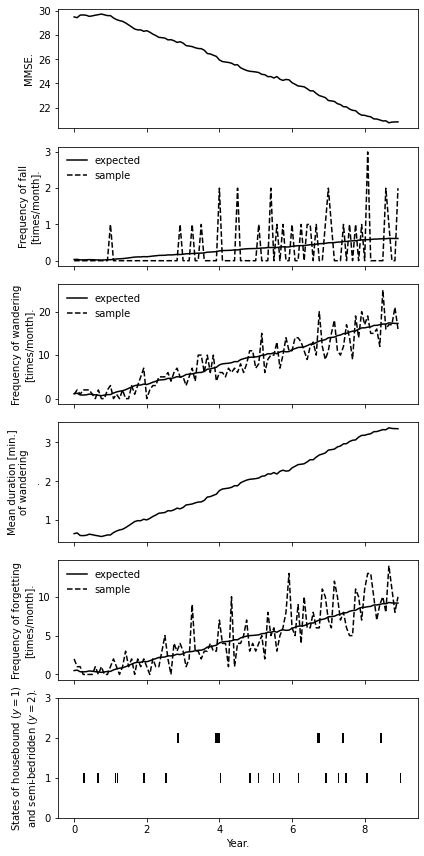

In [3]:
temp_time = time.time()

# test layout
path = Path(layout_data_path / '3/WARDeSoDTAKSCBRFAWMTB/1596,960,2100,222,0LL')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())


# MMSE score
start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)


# Housebound
# housebound_labels[i] = (start_time, end_time) of i-th being housebound
housebound_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/10, 14, 14/5)


# Semi-bedridden
# semi_bedridden_labels[i] = (start_time, end_time) of i-th being semi-bedridden
semi_bedridden_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/20, 30, 30/5)


# Wandering
def calculate_wandering_mean_num(mmse):
    # decide the mean frequency of wandering [times/month]
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 1.86 * mmse + 56
def calculate_wandering_mean_minutes(mmse):
    # decide the mean duration time [minutes] of wandering
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 0.31 * mmse + 9.8
wandering_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_num)
wandering_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in wandering_mean_num]
wandering_mean_minutes = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_minutes)


# Falls
def calculate_falling_mean_num(mmse):
    # decide the mean number [times/month] of falling
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - mmse / 15 + 2
# falling while walking (fall_w)
fall_w_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_w_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_w_mean_num]
# fall while standing (fall_s)
fall_s_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_s_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_s_mean_num]


# Forgetting
def calculate_forgetting_mean_num(mmse):
    # This returns the mean number of forgetting [times/month] by MMSE
    return - mmse + 30

forgetting_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_forgetting_mean_num)
forgetting_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in forgetting_mean_num]


# Figures of anomalies
fig, ax = plt.subplots(6, 1, sharex = 'all', facecolor = 'w',  figsize = (6, 12))
graph_list = [MMSE, fall_w_mean_num, wandering_mean_num, wandering_mean_minutes, forgetting_mean_num]
samples_list = [[], fall_w_num, wandering_num, [], forgetting_num]
label_ylabel_list = ['MMSE.', 'Frequency of fall\n[times/month].', 'Frequency of wandering\n[times/month].',
                     'Mean duration [min.]\nof wandering\n.', 'Frequency of forgetting\n[times/month].']
graph_time_step = timedelta(days = 360)
for (i, data) in enumerate(zip(graph_list, samples_list, label_ylabel_list)):
    x, samples, label = data[0], data[1], data[2]
    ax[i].plot([xx[0] / graph_time_step for xx in x], [xx[2] for xx in x], 'k-', label = 'expected')
    if i == 1 or i == 2 or i == 4:
        ax[i].plot([xx[0] / graph_time_step for xx in samples], [xx[2] for xx in samples], 'k--', label = 'sample')
    ax[i].set_ylabel(label)
ax[1].legend(loc = 'best', frameon = False)
ax[2].legend(loc = 'best', frameon = False)
ax[4].legend(loc = 'best', frameon = False)
# ax[4].set_xlabel('Year.')

point_0, point_last = (timedelta(days = 0), timedelta(days = 0)), (timedelta(days = MMSE[-1][1].days), timedelta(days =  MMSE[-1][1].days))
graph_housebound = deepcopy(housebound_labels)
graph_semi_bedridden = deepcopy(semi_bedridden_labels)
for p in [point_0, point_last]:
    graph_housebound.append(p)
    graph_semi_bedridden.append(p)
ax[5].set_xlabel('Year.')
ax[5].set_ylabel('States of housebound ($y = 1$)\nand semi-bedridden ($y = 2$).')
ax[5].set_ylim(0, 3)
for interval in graph_housebound:
    ax[5].hlines(1, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)
for interval in graph_semi_bedridden:
    ax[5].hlines(2, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)

plt.tight_layout()
plt.savefig(str(data_save_path) + '/anomaly_parameter_transitions.png', dpi = 500)
plt.show()
plt.close()

In [5]:
t_list = []

for _ in range(10):

    temp_time = time.time()

    # test layout
    path = Path(layout_data_path / '3/WARDeSoDTAKSCBRFAWMTB/1596,960,2100,222,0LL')
    data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())


    # MMSE score
    start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
    MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)


    # Housebound
    # housebound_labels[i] = (start_time, end_time) of i-th being housebound
    housebound_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/10, 14, 14/5)


    # Semi-bedridden
    # semi_bedridden_labels[i] = (start_time, end_time) of i-th being semi-bedridden
    semi_bedridden_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/20, 30, 30/5)


    # Wandering
    def calculate_wandering_mean_num(mmse):
        # decide the mean frequency of wandering [times/month]
        if mmse < 0 or 30 < mmse:
            raise ValueError('mmse must be 0 <= mmse <= 30')
        return - 1.86 * mmse + 56
    def calculate_wandering_mean_minutes(mmse):
        # decide the mean duration time [minutes] of wandering
        if mmse < 0 or 30 < mmse:
            raise ValueError('mmse must be 0 <= mmse <= 30')
        return - 0.31 * mmse + 9.8
    wandering_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_num)
    wandering_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in wandering_mean_num]
    wandering_mean_minutes = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_minutes)


    # Falls
    def calculate_falling_mean_num(mmse):
        # decide the mean number [times/month] of falling
        if mmse < 0 or 30 < mmse:
            raise ValueError('mmse must be 0 <= mmse <= 30')
        return - mmse / 15 + 2
    # falling while walking (fall_w)
    fall_w_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
    fall_w_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_w_mean_num]
    # fall while standing (fall_s)
    fall_s_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
    fall_s_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_s_mean_num]


    # Forgetting
    def calculate_forgetting_mean_num(mmse):
        # This returns the mean number of forgetting [times/month] by MMSE
        return - mmse + 30

    forgetting_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_forgetting_mean_num)
    forgetting_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in forgetting_mean_num]


    # Figures of anomalies
    fig, ax = plt.subplots(6, 1, sharex = 'all', facecolor = 'w',  figsize = (6, 12))
    graph_list = [MMSE, fall_w_mean_num, wandering_mean_num, wandering_mean_minutes, forgetting_mean_num]
    samples_list = [[], fall_w_num, wandering_num, [], forgetting_num]
    label_ylabel_list = ['MMSE.', 'Frequency of fall\n[times/month].', 'Frequency of wandering\n[times/month].',
                         'Mean duration [min.]\nof wandering\n.', 'Frequency of forgetting\n[times/month].']
    graph_time_step = timedelta(days = 360)
    for (i, data) in enumerate(zip(graph_list, samples_list, label_ylabel_list)):
        x, samples, label = data[0], data[1], data[2]
        ax[i].plot([xx[0] / graph_time_step for xx in x], [xx[2] for xx in x], 'k-', label = 'expected')
        if i == 1 or i == 2 or i == 4:
            ax[i].plot([xx[0] / graph_time_step for xx in samples], [xx[2] for xx in samples], 'k--', label = 'sample')
        ax[i].set_ylabel(label)
    ax[1].legend(loc = 'best', frameon = False)
    ax[2].legend(loc = 'best', frameon = False)
    ax[4].legend(loc = 'best', frameon = False)
    # ax[4].set_xlabel('Year.')

    point_0, point_last = (timedelta(days = 0), timedelta(days = 0)), (timedelta(days = MMSE[-1][1].days), timedelta(days =  MMSE[-1][1].days))
    graph_housebound = deepcopy(housebound_labels)
    graph_semi_bedridden = deepcopy(semi_bedridden_labels)
    for p in [point_0, point_last]:
        graph_housebound.append(p)
        graph_semi_bedridden.append(p)
    ax[5].set_xlabel('Year.')
    ax[5].set_ylabel('States of housebound ($y = 1$)\nand semi-bedridden ($y = 2$).')
    ax[5].set_ylim(0, 3)
    for interval in graph_housebound:
        ax[5].hlines(1, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)
    for interval in graph_semi_bedridden:
        ax[5].hlines(2, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)

    plt.tight_layout()
    plt.savefig(str(data_save_path) + '/anomaly_parameter_transitions.png', dpi = 500)
    # plt.show()
    plt.close()

    # fall_s_info['place'] defines the places that a resident has the possibility to falling from high place
    fall_s_place_bed = ['Bed']
    # fall_s_place = ['Bed', 'Sofa', 'Dinner_Table_Chair', 'Desk_Chair']
    fall_w_parameters = {'num': fall_w_num, 'mean_lie_down_seconds': 30}
    fall_s_parameters = {'num': fall_s_num, 'mean_lie_down_seconds': 30, 'place': fall_s_place_bed}
    anomaly_parameters = {'housebound_go_out_num': 1/14,
                          'housebound_go_out_duration': 20,
                          'housebound_use_a_phone_num': 1/3,
                          'housebound_use_a_phone_duration': 10,
                          'semi_bedridden_nap_duration': 40,
                          'semi_bedridden_rest_duration': 60,
                          'semi_bedridden_go_out_num': 1/14,
                          'semi_bedridden_go_out_duration': 20,
                          'wandering_num': wandering_num,
                          'wandering_minute': wandering_mean_minutes}



    # Activity sequence (AS)
    state_anomaly_labels = {anomaly.BEING_HOUSEBOUND: housebound_labels, anomaly.BEING_SEMI_BEDRIDDEN: semi_bedridden_labels}
    act_model = activity_model.basic_activity_model
    AS = new_functions.generate_activity_sequence(0, 99, path, original_act_model = act_model,
                                                  state_anomaly_labels = state_anomaly_labels, anomaly_parameters = anomaly_parameters)
    # print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
    new_functions.save_activity_sequence(data_save_path, AS)
    # new_functions.save_activity_sequence_as_image(data_save_path, AS)


    # Walking trajectories (WT)
    indoor_movement = activity_model.indoor_movement  # parameters about walking
    WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot,
                                                     fall_w_parameters = fall_w_parameters, fall_s_parameters = fall_s_parameters)
    # print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))


    # Motion sensor data
    sensors = sensor_model.test_sensors  # for 3/WARDeSoDTAKSCBRFAWMTB/1596,960,2100,222,0LL
    motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
        sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
    # print("Motion sensor data was simulated in {}[s].".format(time.time() - temp_time))
    new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = "PIR_pressure")  # all sensor data

    # decide which activities are forgetting and how long the forgetting continues
    forgetting_labels = anomaly.forgetting_labels(AS, WT, forgetting_num)
    cost_sensor_data = new_functions.generate_cost_sensor_data(sensors, AS, WT, sampling_seconds = 1,
                                                               sync_reference_point = AS[0].start, forgetting_labels = forgetting_labels)
    new_functions.save_binary_sensor_data(data_save_path, sensors, cost_sensor_data, filename = "cost")
    # print("Cost sensor data was simulated in {}[s].".format(time.time() - temp_time))


    print("Finished ({}[s])".format(time.time() - temp_time))

    # save labels of anomalies
    anomaly_labels_path = data_save_path / Path('anomaly_labels')
    if not os.path.exists(path):
        os.makedirs(path)
    anomaly.save_MMSE(anomaly_labels_path, MMSE)
    anomaly.save_MMSE(anomaly_labels_path, wandering_num, 'wandering_num')
    anomaly.save_MMSE(anomaly_labels_path, wandering_mean_minutes, 'wandering_mean_minutes')
    anomaly.save_anomaly_parameters(anomaly_labels_path, fall_w_parameters, 'fall_w_parameters')
    anomaly.save_anomaly_parameters(anomaly_labels_path, fall_s_parameters, 'fall_s_parameters')
    anomaly.save_MMSE(anomaly_labels_path, forgetting_num, 'forgetting_num')
    anomaly.save_housebound_labels(anomaly_labels_path, housebound_labels)
    anomaly.save_housebound_labels(anomaly_labels_path, semi_bedridden_labels, 'semi_bedridden_labels')
    anomaly.save_wandering_labels(anomaly_labels_path, WT)
    anomaly.save_fall_labels(anomaly_labels_path, WT)
    anomaly.save_forgetting_labels(anomaly_labels_path, forgetting_labels)
    
    t_list.append(time.time() - temp_time)

Finished (544.9789810180664[s])
Finished (540.7673256397247[s])
Finished (534.1280393600464[s])
Finished (534.3881685733795[s])
Finished (550.1078608036041[s])
Finished (514.0098414421082[s])
Finished (506.97773361206055[s])
Finished (556.7346043586731[s])
Finished (543.1182014942169[s])
Finished (544.9037091732025[s])


In [6]:
print(sum(t_list) / len(t_list))

537.1000643253326


In [8]:
import numpy as np
t_array = np.array(t_list)
print(np.var(t_array))
print(np.sqrt(np.var(t_array)))

220.02059689061633
14.83309127898215


# sensor responce around fall

In [2]:
temp_time = time.time()

# test layout
path = Path(layout_data_path / '3/WARDeSoDTAKSCBRFAWMTB/1596,960,2100,222,0LL')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

# MMSE score
start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

def calculate_falling_mean_num(mmse):
    # decide the mean number of falling
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - mmse / 15 + 2

# falling while walking
fall_w_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_w_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_w_mean_num]

# fall while standing
fall_s_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_s_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_s_mean_num]

#------------------------------------------------------------------------------------
fall_w_num = [(x[0], x[1], x[2] + 2) for x in fall_w_num]  # test setting!!!!!
fall_s_num = [(x[0], x[1], x[2] + 2) for x in fall_s_num]  # test setting!!!!!
#------------------------------------------------------------------------------------

# fall_s_info['place'] defines the places that a resident has the possibility to falling from high place
fall_s_place_bed = ['Bed']
fall_s_place = ['Bed', 'Sofa', 'Dinner_Table_Chair', 'Desk_Chair']

fall_w_parameters = {'num': fall_w_num, 'mean_lie_down_seconds': 30}
fall_s_parameters = {'num': fall_s_num, 'mean_lie_down_seconds': 30, 'place': fall_s_place_bed}

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_anomaly_parameters(data_save_path, fall_w_parameters, 'fall_w_parameters')
anomaly.save_anomaly_parameters(data_save_path, fall_s_parameters, 'fall_s_parameters')

# generate an activity sequence (AS) and save it
AS = new_functions.generate_activity_sequence(0, 7, path, original_act_model = activity_model.basic_activity_model)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)

# generate walking trajectories (WT) and save it
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot,
                                                 fall_w_parameters = fall_w_parameters, fall_s_parameters = fall_s_parameters)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))
new_functions.save_walking_trajectoires(data_save_path, WT)
anomaly.save_fall_labels(data_save_path, WT)

print('Path that a fall while walking and a fall while standing both occurr: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        new_functions.save_layout(data_save_path, path, WT = [wt], filename = "{}-th path".format(i))
        print("  w: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
        # print("{} == duration: {}".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_s_index + 1] - wt.timestamp[wt.fall_s_index]))
        print("  s: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))
print('Path that a fall while walking occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        new_functions.save_layout(data_save_path, path, WT = [wt], filename = "{}-th path".format(i))
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
print('Path that a fall while standing occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        new_functions.save_layout(data_save_path, path, WT = [wt], filename = "{}-th path".format(i))
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))
        
temp_time = time.time()

# sensor arrangement
sensors = sensor_model.test_sensors  # for 3/WARDeSoDTAKSCBRFAWMTB/1596,960,2100,222,0LL

# simulate sensor data that is related with resident's move.
motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
    sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
print("Sensor data was simulated in {}[s].".format(time.time() - temp_time))
    
# save the sensor data as a text file
new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = "PIR_pressure")  # all sensor data

# save the figure of walking trajectories that falls occur
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        w_c = (wt.centers[wt.fall_w_index][0], wt.centers[wt.fall_w_index][1])
        s_c = (wt.centers[wt.fall_s_index][0], wt.centers[wt.fall_s_index][1])
        file_name = "{}-th path with fall_w at ({},{}) and fall_s at ({}, {})".format(i, w_c[0], w_c[1], s_c[0], s_c[1])
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = file_name, mark_point = [w_c, s_c])
        wt.save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_path".format(i), motion_sensor_data)
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        w_c = (wt.centers[wt.fall_w_index][0], wt.centers[wt.fall_w_index][1])
        file_name = "{}-th path with fall_w at ({},{})".format(i, w_c[0], w_c[1])
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = file_name, mark_point = [w_c])
        wt.save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_path".format(i), motion_sensor_data)
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        s_c = (wt.centers[wt.fall_s_index][0], wt.centers[wt.fall_s_index][1])
        file_name = "{}-th path with fall_s at ({},{})".format(i, s_c[0], s_c[1])
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = file_name, mark_point = [s_c])
        wt.save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_path".format(i), motion_sensor_data)
        
print("Figures are saved in {}[s].".format(time.time() - temp_time))

An activity sequence was generated in 0.030899524688720703 [s].
{'Do laundry', 'Rest', 'Have breakfast', 'Watch TV', 'Change clothes', 'Take a bath', 'Have lunch', 'Have dinner', 'Cooking', 'Clean', 'Read', 'Take a snack', 'Use the phone', 'Brush teeth', 'Defecation', 'Sleep', 'Go out', 'Urination'}
Walking trajectories were generated in 20.875447511672974 [s].
Path that a fall while walking and a fall while standing both occurr: 
Path that a fall while walking occurrs: 
  For 41.92317585029866 seconds from 6 days, 10:24:19.614641 at 5-th step during a path from Desk_Chair to Toilet_Door.
  For 26.136984524607612 seconds from 6 days, 19:37:45.698890 at 1-th step during a path from Sofa to Trash_Bin.
Path that a fall while standing occurrs: 
  For 27.814477892101507 seconds from 5:48:29.805351 at 0-th step during a path from Bed to Kitchen_Stove.
  For 32.43810530306562 seconds from 3 days, 4:48:33.378425 at 0-th step during a path from Bed to Sofa.
Sensor data was simulated in 17.38005

In [5]:
n = 12
file_name = "{}-th path".format(n)
new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [WT[n]], filename = file_name)
WT[n].save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_path".format(n), motion_sensor_data)

# Load sensor data and activity data from text file

In [2]:
sensors = sensor_model.test_sensors
sensor_data = analysis.load_sensor_data(Path('./test_data/PIR_pressure.txt'))
activity_data = analysis.load_activity_sequence(Path('./test_data/activity_sequence.txt'))
print(sensor_data[:3])
print(activity_data[:3])

[(datetime.timedelta(seconds=21579, microseconds=200000), 22, True), (datetime.timedelta(seconds=21610, microseconds=700000), 22, False), (datetime.timedelta(seconds=21611), 2, True)]
[(datetime.timedelta(0), 'Sleep\n'), (datetime.timedelta(seconds=21623, microseconds=535145), 'Do laundry\n'), (datetime.timedelta(seconds=21817, microseconds=531051), 'Cooking\n')]


# Estimate walking speed by mean average distances

- 全てのセンサを使った場合，歩速が遅くなるほど本来よりも推定歩速が速めになる傾向にある？
- 歩行途中をとらえるセンサのみを使った場合，歩速が速くなるほど推定歩速が本来よりも遅めになる傾向にある？


- [ ] 全てのセンサに対して，歩速を変化させたときの，推定歩速 - 真の歩速　をプロットして確認  
- [ ] 歩行途中をとらえるセンサに対して，歩速を変化させたときの，推定歩速 - 真の歩速　をプロットして確認

それとも歩幅とセンサのサンプリングレートに関係あり？

Mean distance: 63.66197723675813.
Mean walking speed: (67.31884749840951, 83.8681669387308).
True walking speed: 68.75.


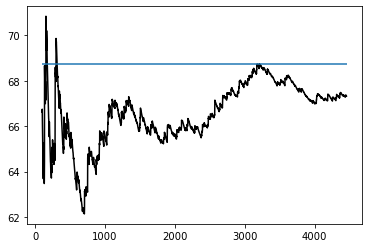

In [2]:
# sensor_data = analysis.load_sensor_data(Path('./test_data/PIR_pressure.txt'))
# activity_data = analysis.load_activity_sequence(Path('./test_data/activity_sequence.txt'))

sensor_data = analysis.load_sensor_data(Path('./test_data_month/PIR_pressure.txt'))
activity_data = analysis.load_activity_sequence(Path('./test_data_month/activity_sequence.txt'))

estimate_walking_speed = analysis.estimate_walking_speed
generate_activation_list = analysis.generate_activation_list

sensors = sensor_model.test_sensors

# target_sensors = list(range(0, 22))
target_sensors = [0, 2, 3, 7, 8, 9, 10, 13, 14, 18]

radius = sensors[0].radius
mean_distance = 4 * radius / np.pi
print("Mean distance: {}.".format(mean_distance))
print("Mean walking speed: {}.".format(estimate_walking_speed(sensor_data, target_sensors, radius)))
indoor_movement = activity_model.indoor_movement
print("True walking speed: {}.".format(indoor_movement.stride / indoor_movement.step_speed))

# add sensor data iteratively
activation_list = generate_activation_list(sensor_data, target_sensors)
walking_speeds_2 = []
for i in range(1, len(activation_list)):
    estimated_speed = (mean_distance * np.reciprocal(np.array(activation_list[:i], dtype = float))).mean()
    walking_speeds_2.append(estimated_speed)
    
start_pos = 100

plt.plot(range(start_pos, len(walking_speeds_2)), walking_speeds_2[start_pos:], color = 'black')
plt.hlines(indoor_movement.stride / indoor_movement.step_speed, start_pos, len(walking_speeds_2), color = 'tab:blue')
plt.show()
plt.close()

# add sensor index iteratively
# sensor_candidates = target_sensors[:]
# sensor_indexes = []
# walking_speeds = []
# for _ in range(len(sensor_candidates)):
#     ind = random.choice(sensor_candidates)
#     sensor_indexes.append(ind)
#     sensor_candidates.remove(ind)
#     estimated_speed = estimate_walking_speed(sensor_data, sensor_indexes, radius)
#     walking_speeds.append(estimated_speed)
# x_labels = [x[0] for x in walking_speeds]
# x_values = range(len(x_labels))
# plt.xticks(x_values, sensor_indexes)
# plt.plot(x_values,x_labels, color = 'black')
# # for (x, y) in zip(x_values, walking_speeds):
# #     plt.errorbar(x, y[0], yerr = y[1], color = 'black')
# plt.hlines(indoor_movement.stride / indoor_movement.step_speed, x_values[0], x_values[-1], color = 'tab:blue')
# plt.show()
# plt.close()

### with multiple data

In [43]:
n = 5

# stride = 55
# step_speed = 0.8

# stride = 70
# step_speed = 0.6

# stride = 70
# step_speed = 0.7

# stride = 60
# step_speed = 0.7

stride = 55
step_speed = 1

for i in range(n):
    temp_time = time.time()

    # test layout
    path = Path(layout_data_path / 'test_layout')
    data_save_path = new_functions.generate_data_folder(path, "n{}_stride{}_speed{}_i{}".format(n, stride, step_speed, i))

    # generate an activity sequence (AS) and save it
    AS = new_functions.generate_activity_sequence(0, 30, path, original_act_model = activity_model.basic_activity_model)
    # new_functions.save_activity_sequence(data_save_path, AS)

    # generate walking trajectories (WT) and save it
    indoor_movement = activity_model.indoor_movement  # parameters about walking
    WT = new_functions.generate_walking_trajectories(path, AS, stride, step_speed, indoor_movement.prefer_foot)
    # new_functions.save_walking_trajectoires(data_save_path, WT)

    # sensor arrangement and save various figures
    sensors = sensor_model.test_sensors  # for 3/WARDeSoDTAKSCBRFAWMTB/1596,960,2100,222,0LL
    PIR_sensors = [s for s in sensors if isinstance(s, sensor_model.CircularPIRSensor)]
    pressure_sensors = [s for s in sensors if isinstance(s, sensor_model.SquarePressureSensor)]
    new_functions.save_layout(data_save_path, path, sensors = sensors, WT = WT)  # all sensors and walking trajectories

    # simulate sensor data that is related with resident's move, and save it as a text file
    motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
        sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
    new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = "PIR_pressure")

    print("{}-th simulation was finished ({}[s])".format(i, time.time() - temp_time))

0-th simulation was finished (139.13564038276672[s])
1-th simulation was finished (137.28874564170837[s])
2-th simulation was finished (137.4196262359619[s])
3-th simulation was finished (143.4816358089447[s])
4-th simulation was finished (146.9058334827423[s])


In [ ]:
n = 5

# stride = 55
# step_speed = 0.8

# stride = 70
# step_speed = 0.6

# stride = 70
# step_speed = 0.7

# stride = 60
# step_speed = 0.7

stride = 55
step_speed = 1

true_walking_speed = stride / step_speed
start_pos = 100

for i in range(n):
    sensor_data = analysis.load_sensor_data(Path("./layout_data/test_layout/n{}_stride{}_speed{}_i{}/PIR_pressure.txt".format(n, stride, step_speed, i)))

    estimate_walking_speed = analysis.estimate_walking_speed
    generate_activation_list = analysis.generate_activation_list

    sensors = sensor_model.test_sensors
    radius = sensors[0].radius
    mean_distance = 4 * radius / np.pi
    
    # target_sensors = list(range(0, 22))
    target_sensors = [0, 2, 3, 7, 8, 9, 10, 13, 14, 18]

    # add sensor data iteratively
    activation_list = generate_activation_list(sensor_data, target_sensors)
    walking_speeds = []
    for j in range(1, len(activation_list)):
        estimated_speed = (mean_distance * np.reciprocal(np.array(activation_list[:j], dtype = float))).mean()
        walking_speeds.append(estimated_speed)

    plt.plot(range(start_pos, len(walking_speeds)), walking_speeds[start_pos:], label = "{}th data".format(i))
plt.hlines(true_walking_speed, start_pos, len(walking_speeds), label = "True: {:.2f}".format(true_walking_speed))
plt.legend()
plt.xlabel('data length')
plt.ylabel('walking speed')
plt.savefig(data_save_path / Path("true{:.3f}_sensor_num{}_start_pos{}.png".format(true_walking_speed, len(target_sensors), start_pos)), dpi = 200)
plt.show()
plt.close()

# Generate anomaly occurrence image

In [3]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

# MMSE score
start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

# Housebound
# housebound_labels[i] = (start_time, end_time) of i-th being housebound
housebound_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/10, 14, 14/5)

# Semi-bedridden
# semi_bedridden_labels[i] = (start_time, end_time) of i-th being semi-bedridden
semi_bedridden_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/20, 30, 30/5)

# Wandering
def calculate_wandering_mean_num(mmse):
    # decide the mean frequency of wandering [times/month]
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 1.86 * mmse + 56
def calculate_wandering_mean_minutes(mmse):
    # decide the mean duration time [minutes] of wandering
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 0.31 * mmse + 9.8
wandering_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_num)
wandering_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in wandering_mean_num]
wandering_mean_minutes = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_minutes)

# Falls
def calculate_falling_mean_num(mmse):
    # decide the mean number [times/month] of falling
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - mmse / 15 + 2
# falling while walking (fall_w)
fall_w_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_w_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_w_mean_num]
# fall while standing (fall_s)
fall_s_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_s_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_s_mean_num]

# Forgetting
def calculate_forgetting_mean_num(mmse):
    # This returns the mean number of forgetting [times/month] by MMSE
    return - mmse + 30

forgetting_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_forgetting_mean_num)
forgetting_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in forgetting_mean_num]


#------------------------------------------------------------------------------ test setting for short days !!!!!
# housebound_labels = [(timedelta(days = 7 * 10), timedelta(days = 7 * 15))]
# semi_bedridden_labels = [(timedelta(days = 7 * 30), timedelta(days = 7 * 45))]
# wandering_num = [(x[0], x[1], x[2] + 30) for x in wandering_num]
# wandering_mean_minutes = [(x[0], x[1], x[2] + 0.2) for x in wandering_mean_minutes]
# fall_w_num = [(x[0], x[1], x[2] + 2) for x in fall_w_num]
# fall_s_num = [(x[0], x[1], x[2] + 2) for x in fall_s_num]
# forgetting_num = [(x[0], x[1], 10) for x in forgetting_mean_num]
#------------------------------------------------------------------------------------------


# fall_s_info['place'] defines the places that a resident has the possibility to falling from high place
fall_s_place_bed = ['Bed']
fall_s_place = ['Bed', 'Sofa', 'Dinner_Table_Chair', 'Desk_Chair']
fall_w_parameters = {'num': fall_w_num, 'mean_lie_down_seconds': 30}
fall_s_parameters = {'num': fall_s_num, 'mean_lie_down_seconds': 30, 'place': fall_s_place}
anomaly_parameters = {'housebound_go_out_num': 1/14,
                      'housebound_go_out_duration': 20,
                      'housebound_use_the_phone_num': 1/3,
                      'housebound_use_the_phone_duration': 10,
                      'semi_bedridden_nap_duration': 40,
                      'semi_bedridden_rest_duration': 60,
                      'semi_bedridden_go_out_num': 1/14,
                      'semi_bedridden_go_out_duration': 20,
                      'wandering_num': wandering_num,
                      'wandering_minute': wandering_mean_minutes}

start_day = 360 * 4
end_day = 360 * 5 - 1
# Activity sequence (AS)
state_anomaly_labels = {anomaly.BEING_HOUSEBOUND: housebound_labels, anomaly.BEING_SEMI_BEDRIDDEN: semi_bedridden_labels}
act_model = activity_model.basic_activity_model
AS = new_functions.generate_activity_sequence(start_day, end_day, path, original_act_model = act_model,
                                              state_anomaly_labels = state_anomaly_labels, anomaly_parameters = anomaly_parameters)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)

# Walking trajectories (WT)
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot,
                                                 fall_w_parameters = fall_w_parameters, fall_s_parameters = fall_s_parameters)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))

# Motion sensor data
sensors = sensor_model.test_sensors  # for the ``test_layout``
motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
    sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
print("Motion sensor data was simulated in {}[s].".format(time.time() - temp_time))
new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = "PIR_pressure")  # all sensor data

# decide which activities are forgetting and how long the forgetting continues
forgetting_labels = anomaly.forgetting_labels(AS, WT, forgetting_num)
cost_sensor_data = new_functions.generate_cost_sensor_data(sensors, AS, WT, sampling_seconds = 1,
                                                           sync_reference_point = AS[0].start, forgetting_labels = forgetting_labels)
new_functions.save_binary_sensor_data(data_save_path, sensors, cost_sensor_data, filename = "cost")
print("Cost sensor data was simulated in {}[s].".format(time.time() - temp_time))

# Results of anomalies
print('Results of anomalies---------------------------')
print("hosuebound_labels: {}".format(housebound_labels))
print("semi_bedridden_labels: {}".format(semi_bedridden_labels))
wandering_result = []
for i, act in enumerate(AS):
    if act.activity.name == activity_model.wandering.name:
        wandering_result.append(i)
print("Total number of wanderings: {})".format(len(wandering_result)))
for i, wt in enumerate(WT):
    if wt.walking_type == new_functions.WANDERING_WALKING:
        print("index: {:04}, start: {}, end: {}, duration: {:.2f}[m].".format(i, wt.start_time, wt.end_time,
                                                                           (wt.end_time - wt.start_time)/timedelta(minutes = 1)))
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = "Sensor and {}-th wandering".format(i))

print('Path that a fall while walking and a fall while standing both occurr: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        print("  w: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
        # print("{} == duration: {}".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_s_index + 1] - wt.timestamp[wt.fall_s_index]))
        print("  s: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))
print('Path that a fall while walking occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
print('Path that a fall while standing occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))
for x in forgetting_labels:
    print("{} ({} - {}), forgetting: {}-th {}, notice: {}-th {} ".format(x[2], x[4], x[5], x[0], AS[x[0]].activity.name,
                                                                         x[1], AS[x[1]].activity.name))

print("Finished ({}[s])".format(time.time() - temp_time))

# save labels of anomalies
anomaly_labels_path = data_save_path / Path('anomaly_labels')
if not os.path.exists(path):
    os.makedirs(path)
anomaly.save_MMSE(anomaly_labels_path, MMSE)
anomaly.save_MMSE(anomaly_labels_path, wandering_num, 'wandering_num')
anomaly.save_MMSE(anomaly_labels_path, wandering_mean_minutes, 'wandering_mean_minutes')
anomaly.save_anomaly_parameters(anomaly_labels_path, fall_w_parameters, 'fall_w_parameters')
anomaly.save_anomaly_parameters(anomaly_labels_path, fall_s_parameters, 'fall_s_parameters')
anomaly.save_MMSE(anomaly_labels_path, forgetting_num, 'forgetting_num')
anomaly.save_housebound_labels(anomaly_labels_path, housebound_labels)
anomaly.save_housebound_labels(anomaly_labels_path, semi_bedridden_labels, 'semi_bedridden_labels')
anomaly.save_wandering_labels(anomaly_labels_path, WT)
anomaly.save_fall_labels(anomaly_labels_path, WT)
anomaly.save_forgetting_labels(anomaly_labels_path, forgetting_labels)

An activity sequence was generated in 0.6731512546539307 [s].
Walking trajectories were generated in 1090.8098211288452 [s].
Motion sensor data was simulated in 1663.7873673439026[s].
1410 days, 0:00:00 - 1440 days, 0:00:00, 1800 days, 0:00:00 - 1830 days, 0:00:00, 
Cost sensor data was simulated in 1823.2083649635315[s].
Results of anomalies---------------------------
hosuebound_labels: [(datetime.timedelta(days=163), datetime.timedelta(days=177, seconds=70432, microseconds=6424)), (datetime.timedelta(days=322), datetime.timedelta(days=337, seconds=34699, microseconds=637528)), (datetime.timedelta(days=384), datetime.timedelta(days=397, seconds=84286, microseconds=540088)), (datetime.timedelta(days=388), datetime.timedelta(days=400, seconds=28806, microseconds=549107)), (datetime.timedelta(days=407), datetime.timedelta(days=416, seconds=70569, microseconds=449038)), (datetime.timedelta(days=393), datetime.timedelta(days=408, seconds=52525, microseconds=509280)), (datetime.timedelta(da

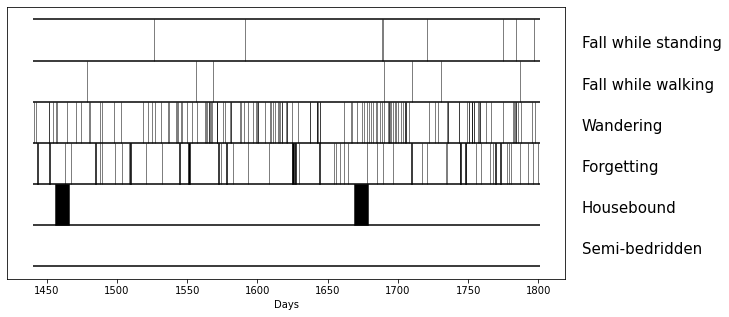

In [11]:
import matplotlib.patches as patches

housebound_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/10, 14, 14/5)
semi_bedridden_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/20, 30, 30/5)

x_range = (AS[0].start.days, AS[-1].end.days + 1)
interval_dict = {}
y_dict = {}

interval_dict['Semi-bedridden'] = []
for s_range in semi_bedridden_labels:
    if not (s_range[-1].days < x_range[0] or x_range[1] < s_range[0].days):
        interval_dict['Semi-bedridden'].append(s_range)
y_dict['Semi-bedridden'] = (0, 1)

interval_dict['Housebound'] = []
for h_range in housebound_labels:
    if not (h_range[-1].days < x_range[0] or x_range[1] < h_range[0].days):
        interval_dict['Housebound'].append(h_range)
y_dict['Housebound'] = (1, 2)

interval_dict['Forgetting'] = []
for x in forgetting_labels:
    if not (x[4].days < x_range[0] or x_range[1] < x[5].days):
        interval_dict['Forgetting'].append((x[4], x[5]))
y_dict['Forgetting'] = (2, 3)

interval_dict['Wandering'] = []
for i in wandering_result:
    wt = WT[i]
    if not (wt.start_time.days < x_range[0] or x_range[1] < wt.end_time.days):
        interval_dict['Wandering'].append((wt.start_time, wt.end_time))
y_dict['Wandering'] = (3, 4)

interval_dict['Fall while walking'] = []
for i, wt in enumerate(WT):
    if wt.fall_w == True:
        s, e = wt.timestamp[wt.fall_w_index], wt.timestamp[wt.fall_w_index] + timedelta(seconds = wt.lie_down_seconds_w)
        if not((s.days < x_range[0]) or (x_range[1] < e.days)):
            interval_dict['Fall while walking'].append((s, e))
y_dict['Fall while walking'] = (4, 5)

interval_dict['Fall while standing'] = []
for i, wt in enumerate(WT):
    if wt.fall_s == True:
        s, e = wt.timestamp[wt.fall_s_index], wt.timestamp[wt.fall_s_index] + timedelta(seconds = wt.lie_down_seconds_s)
        if not((s.days < x_range[0]) or (x_range[1] < e.days)):
            interval_dict['Fall while standing'].append((s, e))
y_dict['Fall while standing'] = (5, 6)

fig_name = 'Anomaly_occurrence.png'

fig = plt.figure(figsize = (10, 5))
ax = plt.axes()
ax.set_xlabel('Days')
for (k, y) in y_dict.items():
    ax.text(x_range[-1] + 30, y[0] + 0.3, k, size = 15)
ax.tick_params(bottom = True, left = False, right = False, top = False)
ax.tick_params(labelbottom = True, labelleft = False)
for i in range(7):
    ax.hlines(i, x_range[0], x_range[1], color = 'black')
for (k, anomaly_list) in interval_dict.items():
    for a in anomaly_list:
        s, e = a[0] / timedelta(days = 1), a[1] / timedelta(days = 1)
        ax.add_patch(patches.Rectangle(xy = (s, y_dict[k][0]), width = e - s, height = 1, ec = 'black', fc = 'black', fill = True, lw = 0.5))
    
plt.savefig(data_save_path / Path(fig_name), dpi = 300, bbox_inches = 'tight')
plt.show()
plt.close()

# Experiments

- 部分的なセンサの時系列パターン [1] D. J. Cook, N. C. Krishnan and P. Rashidi, "Activity Discovery and Activity Recognition: A New Partnership," in IEEE Transactions on Cybernetics, vol. 43, no. 3, pp. 820-828,
- 単位時間におけるセンサの反応頻度，推定した移動距離，無反応時間間隔 [2] Detection of Abnormal Living Patterns for Elderly Living Alone Using Support Vector Data Description
- センサ位置から推定した滞在箇所，滞在継続時間 [3] Anomaly Detection Algorithm Based on Life Pattern Extraction from Accumulated Pyroelectric Sensor Data
上記のものや特徴量選択
- ベクトル化 [4] Activity2vec, [5] sensor2vec

to do
- [2] の特徴量を抽出する関数の作成
- pickle を使った WalkingTrajectory や ActivitySequence の保存と再構成の実験
- 数年分のデータ作成のためのメモリ調査
- 数年分のデータ作成（必要ならばセンサデータは書き込みながら作成する）
- センサデータからの場所列の推定（行動認識）
- [3] を実験できるか試す
- 今までのアイデアをまとめる。サンプリング幅の異なる複数異常をオンラインに検出するアルゴリズムを作りたい。サンプリング幅の次元を追加する？
- Toy dataset を作って確かめる必要があるかどうか

### Detection of Abnormal Living Patterns for Elderly Living Alone Using Support Vector Data Description